In [4]:
%pip install pandas matplotlib seaborn scikit-learn kagglehub



Note: you may need to restart the kernel to use updated packages.


C:\Users\ysmak\AppData\Local\Temp\ipykernel_10088\2172277749.py:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(



First 5 records:

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Column info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Summary statistics:


       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85

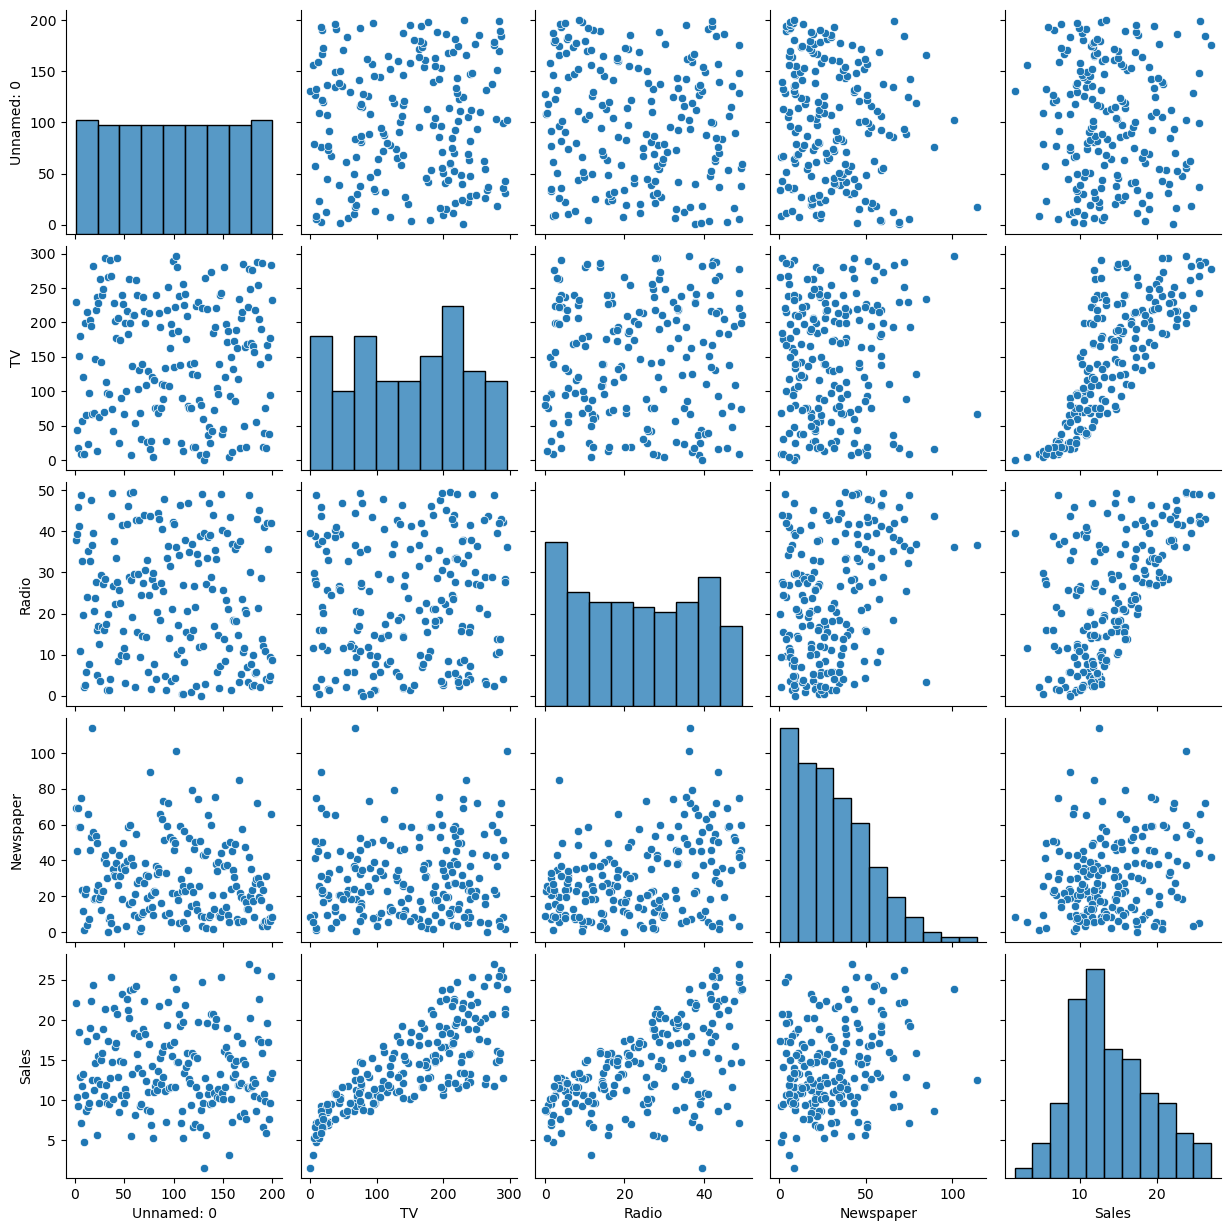

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
import kagglehub
from kagglehub import KaggleDatasetAdapter
# from sklearn.linear_model import LinearRegression

file_path = "Advertising.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "bumba5341/advertisingcsv",
    file_path,
)

print("\nFirst 5 records:\n")
print(df.head())
print("\nColumn info:\n\n")
print(df.info())
print("\nSummary statistics:\n\n")
print(df.describe())
print("\nMissing values in each column:\n\n")
print(df.isnull().sum())

sns.pairplot(df)
plt.show()



C:\Users\ysmak\AppData\Local\Temp\ipykernel_10088\2602000588.py:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


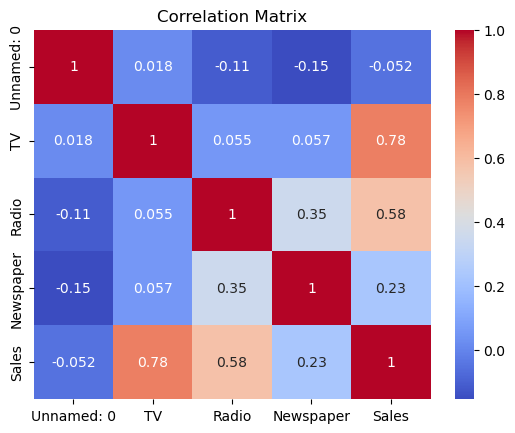

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
# import kagglehub
# from kagglehub import KaggleDatasetAdapter
# from sklearn.linear_model import LinearRegression

file_path = "Advertising.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "bumba5341/advertisingcsv",
    file_path,
)

print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\ysmak\AppData\Local\Temp\ipykernel_10088\3683056342.py:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


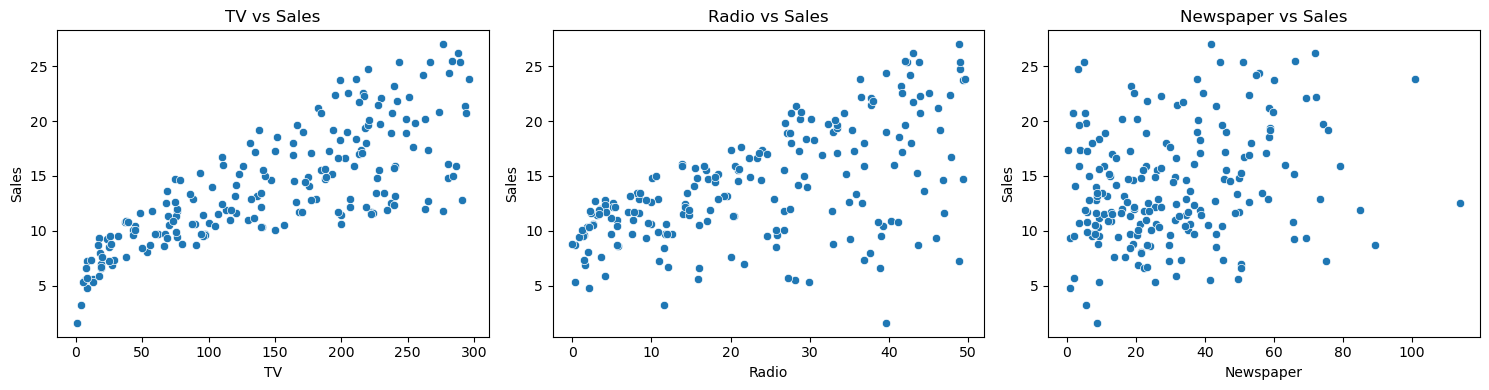

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
# import kagglehub
# from kagglehub import KaggleDatasetAdapter
# from sklearn.linear_model import LinearRegression

file_path = "Advertising.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "bumba5341/advertisingcsv",
    file_path,
)
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')

plt.subplot(1,3,2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')

plt.subplot(1,3,3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')
plt.tight_layout()
plt.show()


C:\Users\ysmak\AppData\Local\Temp\ipykernel_10088\1256562229.py:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(
D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error (RMSE): 1.78
R^2 Score: 0.90
Feature coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629
Feature names: ['TV', 'Radio', 'Newspaper']


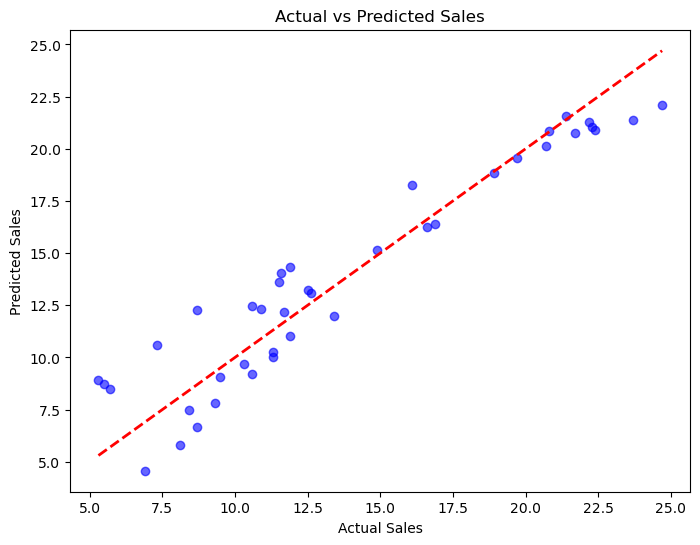

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "Advertising.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "bumba5341/advertisingcsv",
    file_path,
)

X= df[['TV', 'Radio', 'Newspaper']]
y= df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred,squared=False)
r2=r2_score(y_test,y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

print("Feature coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Feature names:", X_train.columns.tolist())

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue',alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

C:\Users\ysmak\AppData\Local\Temp\ipykernel_10088\2577284991.py:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(
D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest RMSE: 0.77
Random Forest R^2 Score: 0.98
TV           0.624810
Radio        0.362201
Newspaper    0.012989
dtype: float64


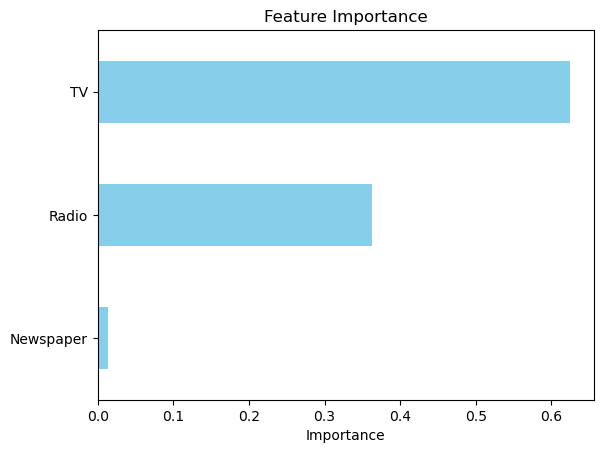

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "Advertising.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "bumba5341/advertisingcsv",
    file_path,
)

X= df[['TV', 'Radio', 'Newspaper']]
y= df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R^2 Score: {r2_rf:.2f}")
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()
